In [1]:
import censusdis.data as ced
from censusdis.states import STATE_GA # Example: for Georgia, replace with desired state

# American Community Survey 5-Year Data (e.g., 2022)
DATASET = "acs/acs5"
YEAR = 2022 # Specify the desired year

# Variable for Median Household Income
# You can find variable codes on the Census API documentation
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

In [2]:
 # Download data for all counties in a specific state
 # Replace STATE_GA with the desired state constant (e.g., STATE_NY for New York)
county_income_data = ced.download(
    DATASET,
    download_variables = ["NAME",MEDIAN_HOUSEHOLD_INCOME_VARIABLE], # Include "NAME" for county names
    state=STATE_GA,
    county="*", # "*" indicates all counties in the specified state
    vintage=YEAR
)

    # If you want data for all counties in the entire US (can be a large dataset)
    # county_income_data_us = ced.download(
    # DATASET,
    # [MEDIAN_HOUSEHOLD_INCOME_VARIABLE, "NAME"],
    # county="*",
    # year=YEAR
    # )

In [3]:
import censusdis.data as ced
from censusdis.datasets import ACS5
from censusdis import states
import pandas as pd
import os

years = [2010, 2011, 2012, 2013,2014,2015,2016,2017]
dfs = []
for state_code in states.ALL_STATES_AND_DC:  # loop over all 50 states
    for year in years:
        df = ced.download(
            dataset="acs/acs5",
            vintage=year,
            download_variables=['NAME', 'B19013_001E','B09001_001E','B01003_001E'],
            state=state_code,
            county='*'
        )
        df['Year'] = year
        df.rename(columns={'B19013_001E': 'Median Household Income','B09001_001E':'Total Population Under 18','B01003_001E':'Total Population'}, inplace=True)
        dfs.append(df)

all_states_df = pd.concat(dfs, ignore_index=True)
all_states_df.sample(15)

,STATE,COUNTY,NAME,Median Household Income,Total Population Under 18,Total Population,Year
20369,48,055,"Caldwell County, Texas",41594.0,9994,37416,2010
20167,47,105,"Loudon County, Tennessee",55431.0,10226,51024,2017
11161,28,057,"Itawamba County, Mississippi",38358.0,5176,23439,2017
11061,28,061,"Jasper County, Mississippi",34993.0,3836,16538,2016
17447,40,091,"McIntosh County, Oklahoma",36011.0,4179,20280,2015
23776,53,061,"Snohomish County, Washington",68381.0,173723,724627,2013
22324,49,005,"Cache County, Utah",49506.0,35886,114181,2013
13281,31,099,"Kearney County, Nebraska",54518.0,1582,6552,2010
19006,46,039,"Deuel County, South Dakota",46186.0,1025,4366,2011
24043,54,037,"Jefferson County, West Virginia",65285.0,12564,52874,2011


In [4]:
# Rename the income column for clarity
all_states_df['Percent Population Under 18'] = all_states_df['Total Population Under 18']/(all_states_df['Total Population'])
all_states_df.head()


,STATE,COUNTY,NAME,Median Household Income,Total Population Under 18,Total Population,Year,Percent Population Under 18
0,01,001,"Autauga County, Alabama",53255.0,14725,53155,2010,0.277020
1,01,003,"Baldwin County, Alabama",50147.0,40974,175791,2010,0.233084
2,01,005,"Barbour County, Alabama",33219.0,6230,27699,2010,0.224918
3,01,007,"Bibb County, Alabama",41770.0,5298,22610,2010,0.234321
4,01,009,"Blount County, Alabama",45549.0,14048,56692,2010,0.247795


In [5]:
import pandas as pd
file_middle = ['2012_2010','2013_2011','2014_2012','2015_2013','2016_2014','2017_2015','2018_2016','2019_2017']
file_start = 'MMG'
file_end = 'Data_ToShare.xlsx'
files = [file_start + middle + file_end for middle in file_middle]
food_data = pd.DataFrame()
for file in files:
    new = pd.read_excel(file,sheet_name= 'County')
    new['Year'] = int(file[8:12])
    new.columns = [column.strip().replace('#','Number').replace('insecurity','Insecurity').replace('% food','% of food').replace('food','Food').replace('Insecure Persons in','Insecure Persons').replace('rate','Rate') for column in new.columns]
    food_data = pd.concat([food_data,new], axis = 0,ignore_index= True)

food_data.head()

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall,Year
0,1001,AL,"Autauga County, Alabama",0.134,7140,1.3,SNAP,1.85,Other Nutrition Program,0.327,0.208,0.465,0.203,2980.0,0.51,0.49,2.58,3170830,2010
1,1003,AL,"Baldwin County, Alabama",0.134,23570,1.3,SNAP,1.85,Other Nutrition Program,0.347,0.287,0.366,0.238,9720.0,0.59,0.41,2.64,10710730,2010
2,1005,AL,"Barbour County, Alabama",0.232,6440,1.3,SNAP,1.85,Other Nutrition Program,0.479,0.171,0.350,0.258,1600.0,0.87,0.13,2.53,2804540,2010
3,1007,AL,"Bibb County, Alabama",0.157,3550,1.3,SNAP,1.85,Other Nutrition Program,0.358,0.288,0.354,0.249,1300.0,0.64,0.36,2.55,1558200,2010
4,1009,AL,"Blount County, Alabama",0.126,7160,1.3,SNAP,1.85,Other Nutrition Program,0.410,0.305,0.285,0.254,3540.0,0.53,0.47,2.50,3081120,2010


In [6]:
food_data.columns 

Index(['FIPS', 'State', 'County, State', 'Food Insecurity Rate',
       'Number of Food Insecure Persons', 'Low Threshold in state',
       'Low Threshold Type', 'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate', 'Number of Food Insecure Children',
       '% of Food insecure children in HH w/ HH incomes below 185 FPL',
       '% of Food insecure children in HH w/ HH incomes above 185 FPL',
       'Cost Per Meal', 'Weighted Annual Food Budget Shortfall', 'Year'],
      dtype='object')

In [7]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25140 entries, 0 to 25139
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   FIPS                                                           25140 non-null  int64  
 1   State                                                          25140 non-null  object 
 2   County, State                                                  25140 non-null  object 
 3   Food Insecurity Rate                                           25140 non-null  float64
 4   Number of Food Insecure Persons                                25140 non-null  int64  
 5   Low Threshold in state                                         25140 non-null  float64
 6   Low Threshold Type                                             25140 non-null  object 
 7   High Threshold in state                                   

In [8]:
food_data = food_data.loc[food_data['Child Food Insecurity Rate']!= '-*']

In [9]:
food_data['Child Food Insecurity Rate'] = food_data['Child Food Insecurity Rate'].astype('float')
food_data['% of Food insecure children in HH w/ HH incomes below 185 FPL'] = food_data['% of Food insecure children in HH w/ HH incomes below 185 FPL'].astype('float')
food_data['% of Food insecure children in HH w/ HH incomes above 185 FPL'] = food_data['% of Food insecure children in HH w/ HH incomes above 185 FPL'].astype('float')

Text(0, 0.5, 'Count')

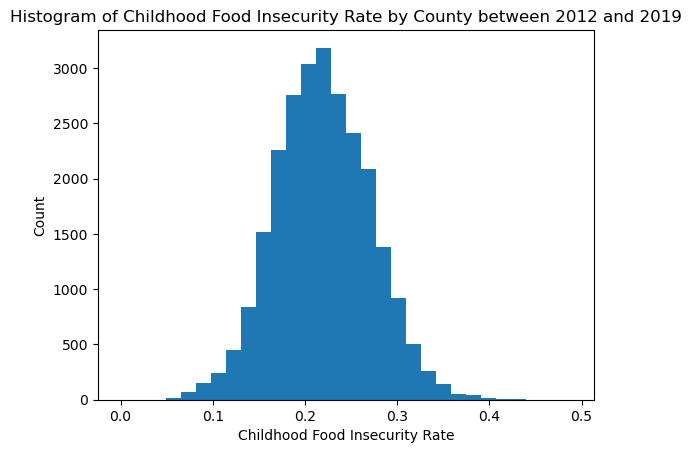

In [10]:
food_data['Child Food Insecurity Rate'].hist(grid = False, bins = 30)
import matplotlib.pyplot as plt
plt.title('Histogram of Childhood Food Insecurity Rate by County between 2012 and 2019')
plt.xlabel('Childhood Food Insecurity Rate')
plt.ylabel('Count')

<Axes: xlabel='Child Food Insecurity Rate', ylabel='Density'>

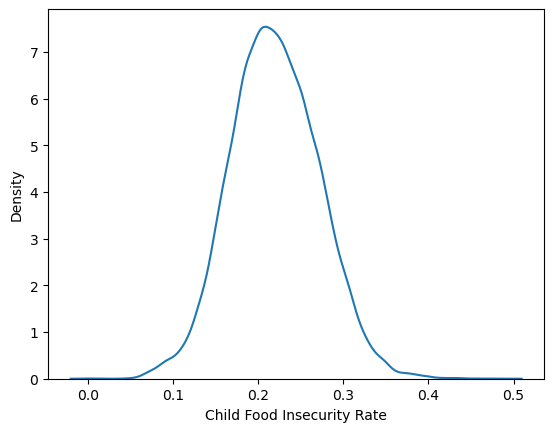

In [11]:
import seaborn as sns
sns.kdeplot(data = food_data, x = 'Child Food Insecurity Rate')

In [12]:
food_data.loc[food_data['FIPS'].isin([1001,36061])]

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall,Year
0,1001,AL,"Autauga County, Alabama",0.134,7140,1.3,SNAP,1.85,Other Nutrition Program,0.327,0.208,0.465,0.203,2980.0,0.510,0.490,2.580000,3170830,2010
1858,36061,NY,"New York County, New York",0.131,206770,1.3,SNAP,1.85,Other Nutrition Program,0.495,0.164,0.341,0.213,50670.0,0.630,0.370,3.910000,139161760,2010
3143,1001,AL,"Autauga County, Alabama",0.136,7310,1.3,SNAP,1.85,Other Nutrition Program,0.385,0.170,0.445,0.196,2890.0,0.630,0.370,2.820000,3360680,2011
5001,36061,NY,"New York County, New York",0.163,259340,1.3,SNAP,1.85,Other Nutrition Program,0.542,0.126,0.332,0.222,53250.0,0.609,0.391,3.910000,165313010,2011
6286,1001,AL,"Autauga County, Alabama",0.135,7360,1.3,SNAP,1.85,Other Nutrition Program,0.423,0.162,0.414,0.205,3010.0,0.630,0.370,2.986678,3850000,2012
8144,36061,NY,"New York County, New York",0.162,258970,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.698,0.000,0.302,0.220,52470.0,0.610,0.390,3.989642,180950000,2012
9429,1001,AL,"Autauga County, Alabama",0.139,7620,1.3,SNAP,1.85,Other Nutrition Program,0.461,0.170,0.370,0.215,3090.0,0.690,0.310,3.060000,4132000,2013
11287,36061,NY,"New York County, New York",0.153,246120,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.713,0.000,0.287,0.209,49480.0,0.650,0.350,4.370000,190517000,2013
12572,1001,AL,"Autauga County, Alabama",0.144,7930,1.3,SNAP,1.85,Other Nutrition Program,0.451,0.193,0.356,0.224,3190.0,0.720,0.280,3.160000,4425000,2014
14430,36061,NY,"New York County, New York",0.151,243570,2.0,"SNAP, Other Nutrition Programs",2.00,"SNAP, Other Nutrition Programs",0.733,NaN,0.267,0.190,45200.0,0.650,0.350,4.580000,197030000,2014


In [13]:
numeric_data = food_data.iloc[:,[5,7,11,12,14,15,16]]
numeric_data.corr()

,Low Threshold in state,High Threshold in state,% FI > High Threshold,Child Food Insecurity Rate,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal
Low Threshold in state,1.000000,0.836389,0.059251,-0.123706,-0.094574,0.093758,0.164580
High Threshold in state,0.836389,1.000000,0.011019,-0.103963,-0.051564,0.050871,0.167665
% FI > High Threshold,0.059251,0.011019,1.000000,-0.485914,-0.752448,0.753712,0.124791
Child Food Insecurity Rate,-0.123706,-0.103963,-0.485914,1.000000,0.435442,-0.434150,-0.274379
% of Food insecure children in HH w/ HH incomes below 185 FPL,-0.094574,-0.051564,-0.752448,0.435442,1.000000,-0.989176,-0.146106
% of Food insecure children in HH w/ HH incomes above 185 FPL,0.093758,0.050871,0.753712,-0.434150,-0.989176,1.000000,0.151015
Cost Per Meal,0.164580,0.167665,0.124791,-0.274379,-0.146106,0.151015,1.000000


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

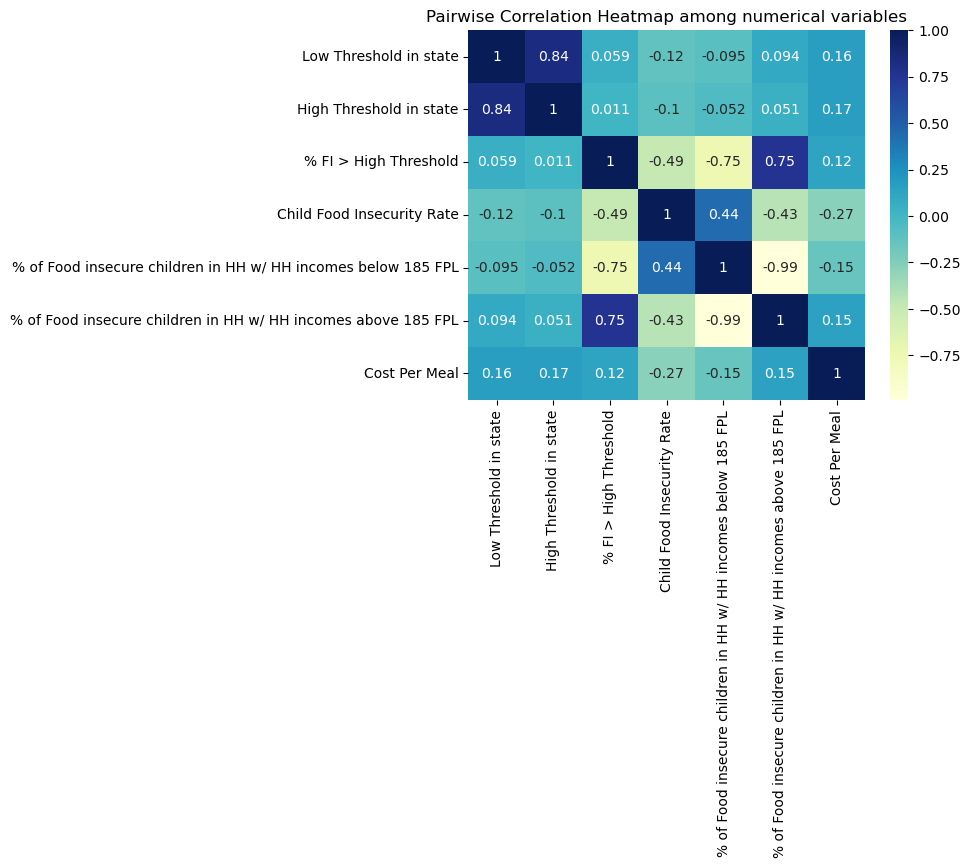

In [15]:
corr = numeric_data.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True)
plt.title('Pairwise Correlation Heatmap among numerical variables')
plt.show()

In [16]:
all_states_df['FIPS'] = all_states_df['STATE'].astype(str) + all_states_df['COUNTY'].astype(str)
all_states_df.head()

,STATE,COUNTY,NAME,Median Household Income,Total Population Under 18,Total Population,Year,Percent Population Under 18,FIPS
0,01,001,"Autauga County, Alabama",53255.0,14725,53155,2010,0.277020,01001
1,01,003,"Baldwin County, Alabama",50147.0,40974,175791,2010,0.233084,01003
2,01,005,"Barbour County, Alabama",33219.0,6230,27699,2010,0.224918,01005
3,01,007,"Bibb County, Alabama",41770.0,5298,22610,2010,0.234321,01007
4,01,009,"Blount County, Alabama",45549.0,14048,56692,2010,0.247795,01009


In [17]:
all_states_df['FIPS'] = all_states_df['FIPS'].astype(int)

In [18]:
join_data = all_states_df[['FIPS','Year','Median Household Income','Total Population Under 18','Total Population','Percent Population Under 18']]
merge_data = food_data.merge(join_data,how='left',on=['FIPS','Year'])

In [19]:
merge_data

,FIPS,State,"County, State",Food Insecurity Rate,Number of Food Insecure Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,...,Number of Food Insecure Children,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Weighted Annual Food Budget Shortfall,Year,Median Household Income,Total Population Under 18,Total Population,Percent Population Under 18
0,1001,AL,"Autauga County, Alabama",0.134,7140,1.3,SNAP,1.85,Other Nutrition Program,0.327,...,2980.0,0.51,0.49,2.58,3170830,2010,53255.0,14725,53155,0.277020
1,1003,AL,"Baldwin County, Alabama",0.134,23570,1.3,SNAP,1.85,Other Nutrition Program,0.347,...,9720.0,0.59,0.41,2.64,10710730,2010,50147.0,40974,175791,0.233084
2,1005,AL,"Barbour County, Alabama",0.232,6440,1.3,SNAP,1.85,Other Nutrition Program,0.479,...,1600.0,0.87,0.13,2.53,2804540,2010,33219.0,6230,27699,0.224918
3,1007,AL,"Bibb County, Alabama",0.157,3550,1.3,SNAP,1.85,Other Nutrition Program,0.358,...,1300.0,0.64,0.36,2.55,1558200,2010,41770.0,5298,22610,0.234321
4,1009,AL,"Blount County, Alabama",0.126,7160,1.3,SNAP,1.85,Other Nutrition Program,0.410,...,3540.0,0.53,0.47,2.50,3081120,2010,45549.0,14048,56692,0.247795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25133,56037,WY,"Sweetwater County, Wyoming",0.107,4750,1.3,SNAP,1.85,Other Nutrition Program,0.430,...,2030.0,0.51,0.49,3.14,2542000,2017,71083.0,11956,44527,0.268511
25134,56039,WY,"Teton County, Wyoming",0.097,2220,1.3,SNAP,1.85,Other Nutrition Program,0.360,...,520.0,0.56,0.44,4.20,1592000,2017,80049.0,4435,22923,0.193474
25135,56041,WY,"Uinta County, Wyoming",0.128,2660,1.3,SNAP,1.85,Other Nutrition Program,0.562,...,1160.0,0.64,0.36,2.95,1340000,2017,54672.0,6144,20758,0.295982
25136,56043,WY,"Washakie County, Wyoming",0.112,920,1.3,SNAP,1.85,Other Nutrition Program,0.505,...,350.0,0.74,0.27,3.16,497000,2017,51362.0,2030,8253,0.245971


In [20]:
food_data.isna().sum()

FIPS                                                                0
State                                                               0
County, State                                                       0
Food Insecurity Rate                                                0
Number of Food Insecure Persons                                     0
Low Threshold in state                                              0
Low Threshold Type                                                  0
High Threshold in state                                             0
High Threshold Type                                                 0
% FI ≤ Low Threshold                                                0
% FI Btwn Thresholds                                             3893
% FI > High Threshold                                               0
Child Food Insecurity Rate                                          5
Number of Food Insecure Children                                    5
% of Food insecure c

<Axes: xlabel='Median Household Income', ylabel='Child Food Insecurity Rate'>

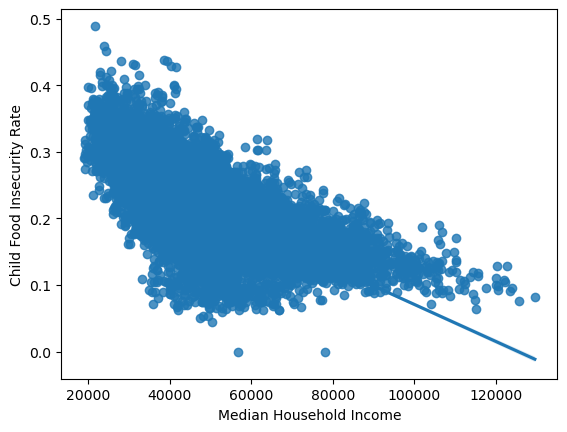

In [21]:
sns.regplot(data = merge_data.loc[merge_data['Median Household Income'].notnull()], x = 'Median Household Income', y = 'Child Food Insecurity Rate')

In [22]:
numeric_data = merge_data.iloc[:,[5,7,11,12,14,15,16,18,19,22]]
numeric_data.corr()

,Low Threshold in state,High Threshold in state,% FI > High Threshold,Child Food Insecurity Rate,% of Food insecure children in HH w/ HH incomes below 185 FPL,% of Food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal,Year,Median Household Income,Percent Population Under 18
Low Threshold in state,1.000000,0.836389,0.059251,-0.123706,-0.094574,0.093758,0.164580,0.069849,0.192049,-0.188430
High Threshold in state,0.836389,1.000000,0.011019,-0.103963,-0.051564,0.050871,0.167665,0.053089,0.113641,-0.192967
% FI > High Threshold,0.059251,0.011019,1.000000,-0.485914,-0.752448,0.753712,0.124791,-0.069767,0.667393,-0.135362
Child Food Insecurity Rate,-0.123706,-0.103963,-0.485914,1.000000,0.435442,-0.434150,-0.274379,-0.237286,-0.659730,0.104855
% of Food insecure children in HH w/ HH incomes below 185 FPL,-0.094574,-0.051564,-0.752448,0.435442,1.000000,-0.989176,-0.146106,0.081365,-0.641336,-0.035650
% of Food insecure children in HH w/ HH incomes above 185 FPL,0.093758,0.050871,0.753712,-0.434150,-0.989176,1.000000,0.151015,-0.077384,0.641574,0.047300
Cost Per Meal,0.164580,0.167665,0.124791,-0.274379,-0.146106,0.151015,1.000000,0.506888,0.355755,-0.211447
Year,0.069849,0.053089,-0.069767,-0.237286,0.081365,-0.077384,0.506888,1.000000,0.124375,-0.119775
Median Household Income,0.192049,0.113641,0.667393,-0.659730,-0.641336,0.641574,0.355755,0.124375,1.000000,0.109574
Percent Population Under 18,-0.188430,-0.192967,-0.135362,0.104855,-0.035650,0.047300,-0.211447,-0.119775,0.109574,1.000000


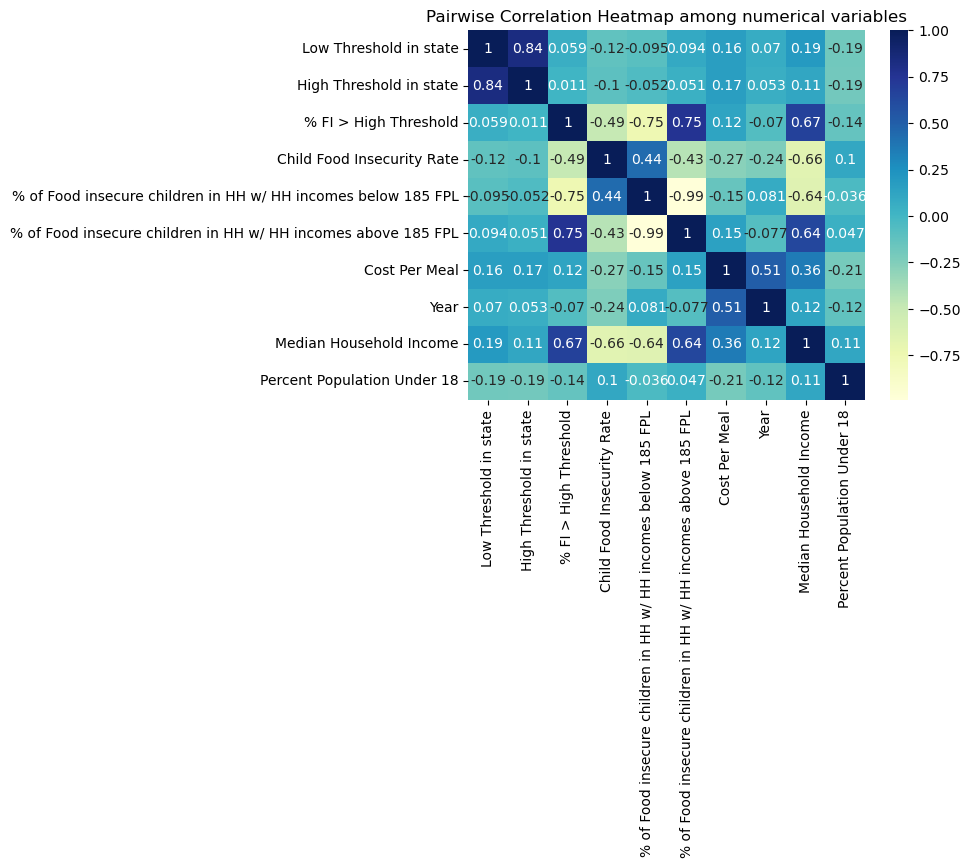

In [23]:
corr = numeric_data.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True)
plt.title('Pairwise Correlation Heatmap among numerical variables')
plt.show()

In [24]:
import statsmodels.api as sm
merge_data = merge_data.loc[merge_data['Median Household Income'].notnull()]
merge_data = merge_data.loc[merge_data['Child Food Insecurity Rate'].notnull()]
x = sm.add_constant(merge_data[['Median Household Income','% FI > High Threshold','Low Threshold in state','Cost Per Meal','Year','Percent Population Under 18']])
y = merge_data['Child Food Insecurity Rate']
model = sm.OLS(y,x).fit()
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     Child Food Insecurity Rate   R-squared:                       0.494
Model:                                    OLS   Adj. R-squared:                  0.494
Method:                         Least Squares   F-statistic:                     4091.
Date:                        Tue, 02 Dec 2025   Prob (F-statistic):               0.00
Time:                                16:00:20   Log-Likelihood:                 47334.
No. Observations:                       25132   AIC:                        -9.465e+04
Df Residuals:                           25125   BIC:                        -9.460e+04
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [27]:
import geopandas as gpd
counties = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip")

In [28]:
food_data_2017 = food_data.loc[food_data['Year'] == 2017]
food_data_2017['FIPS'] = food_data_2017['FIPS'].astype(str)
food_data_2017['FIPS'] = food_data_2017['FIPS'].where(food_data_2017['FIPS'].str.len() == 5,'0' + food_data_2017['FIPS'])
map_data = counties.merge(food_data_2017,left_on = 'GEOID',right_on = 'FIPS', how = 'inner')

C:\Users\Owner\AppData\Local\Temp\ipykernel_18828\3214368164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data_2017['FIPS'] = food_data_2017['FIPS'].astype(str)
C:\Users\Owner\AppData\Local\Temp\ipykernel_18828\3214368164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data_2017['FIPS'] = food_data_2017['FIPS'].where(food_data_2017['FIPS'].str.len() == 5,'0' + food_data_2017['FIPS'])


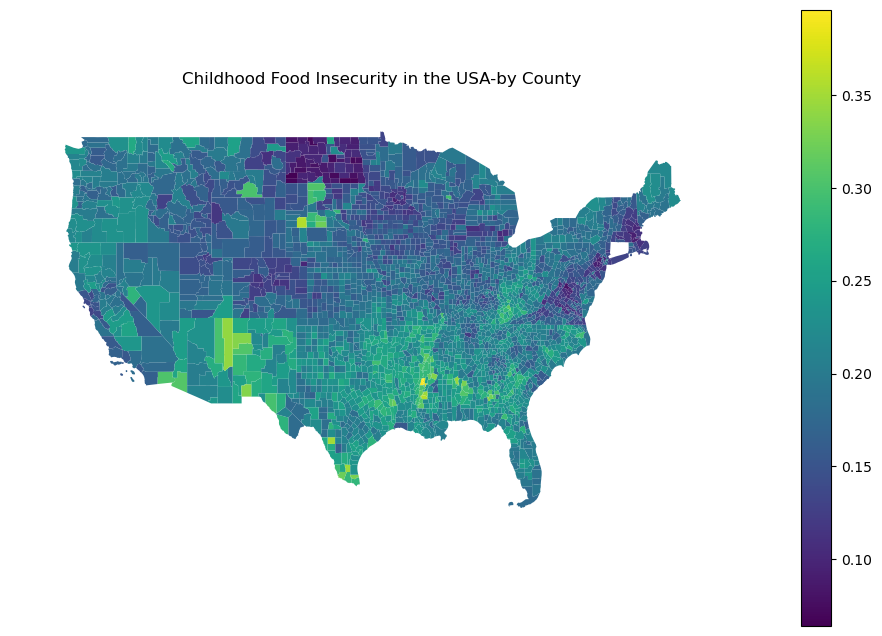

In [32]:
fig,ax = plt.subplots(figsize=(12,8))
map_data.plot(column = 'Child Food Insecurity Rate',legend= True,ax = ax)
ax.set_xlim(-130,-60)
ax.set_ylim(22,52)
plt.title('Childhood Food Insecurity in the USA-by County')
plt.xticks([])
plt.yticks([])
ax.set_frame_on(False)
plt.show()

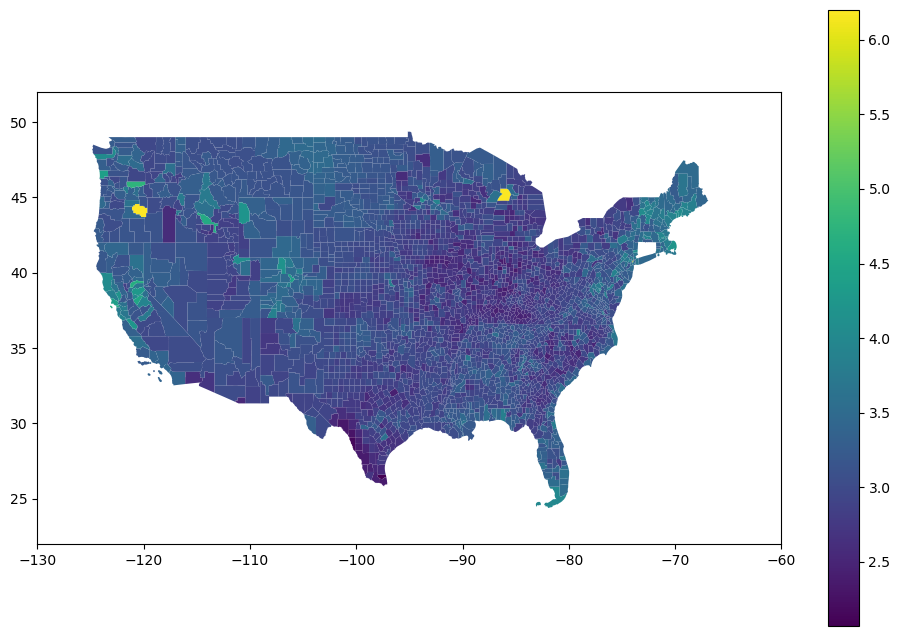

In [30]:
fig,ax = plt.subplots(figsize=(12,8))
map_data.plot(column = 'Cost Per Meal',legend= True,ax = ax)
ax.set_xlim(-130,-60)
ax.set_ylim(22,52)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(merge_data[['Median Household Income','% FI > High Threshold','Low Threshold in state','Cost Per Meal','Year','Percent Population Under 18']],merge_data['Child Food Insecurity Rate'],test_size=0.2,random_state=42)

In [27]:
X_ols = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)
model = sm.OLS(y_train,X_ols).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Child Food Insecurity Rate   R-squared:                       0.493
Model:                                    OLS   Adj. R-squared:                  0.493
Method:                         Least Squares   F-statistic:                     3259.
Date:                        Tue, 02 Dec 2025   Prob (F-statistic):               0.00
Time:                                16:10:08   Log-Likelihood:                 37862.
No. Observations:                       20105   AIC:                        -7.571e+04
Df Residuals:                           20098   BIC:                        -7.565e+04
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [29]:
y_pred = model.predict(X_ols_test)
print(root_mean_squared_error(y_test,y_pred))

0.036787051320709085
